# Study of Correlation between Contact Maps and pLMs Attention Scores in the context of Ubiquitin

# Introduction

Protein language models are computational tools inspired by natural language processing techniques to analyze and understand protein sequences. Using large datasets of protein sequences, they capture patterns that represent biological functions, structures, and interactions. This enables predictions of protein folding, function, and  the design of novel proteins among others. These models hold potential for advancements in drug discovery, enzyme engineering, and understanding of diseases at the molecular level.


However, with pLMs being hard to interpret, there is little understood about why and how they make those predictions. The objective of this project is to analyze if the attention patterns in pLMs correlate with protein-related properties. In particular, we focus on how attention correlates with contact maps. We use the pLM ESM2 and Ubiquitin as a test protein.

*Ubiquitin protein*

Ubiquitin is a small regulatory protein found in almost all tissues of eukaryotic organisms, where it plays a very important role in various cellular processes, specially in protein degradation via the ubiquitin-proteasome pathway. It is composed of 76 amino acids, and its sequence is highly conserved across species due to its critical role in maintaining cellular homeostasis.

*Structure*

Secondary structure:

*   Five β-strands (β1–β5): Form a β-sheet that provides stability to the protein core.
*   One α-helix (α1): Located between β-strands, running antiparallel to the β-sheet.
*   One 3₁₀ helix: A short helix near the C-terminal region, which contributes to the C-terminal tail region.

Tertiary Structure:

* The β-sheet forms the core of the protein, while the α-helix and the loops are located on the surface, allowing interaction with other proteins.
* The structure is stabilized by hydrophobic interactions between the β-strands and the α-helix, as well as hydrogen bonds that hold the β-sheet together.
* The C-terminal tail of ubiquitin (residues 72–76) provides the glycine (Gly76) residue that links ubiquitin to target proteins via an isopeptide bond.


3D Visualization of Ubiquitin structure

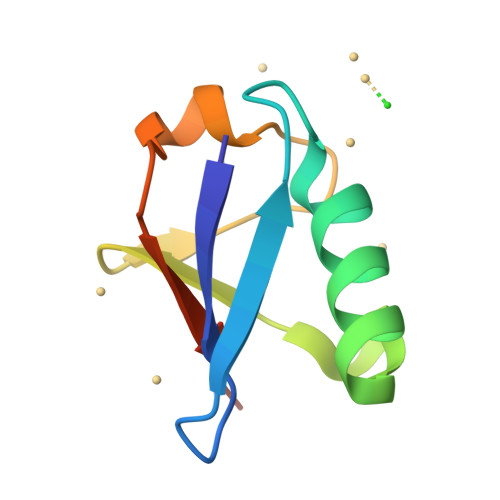

# Methods

### Coordinate Extraction and Contact Map Generation

*Coordinate extraction*

We use the C-alpha atom coordinates of the protein from its PDB file to identify the amino acids in the protein sequence. The C-alpha atom is commonly used to represent the backbone structure of a protein, as it is present in all amino acids.

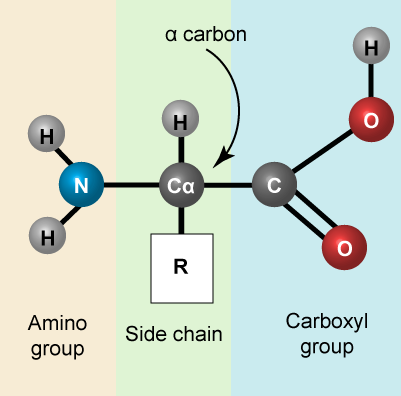

*Contact map generation*

From the coordinates, we can construct a contact map, which is a binary matrix indicating whether two residues are within a certain cutoff distance. In our experiments we use a threshold of 10 Å, a recommended value for defining contacts (although 8 Å is also a threshold commonly used). https://pmc.ncbi.nlm.nih.gov/articles/PMC3583236/

Once the structure is loaded, we calculate the distance between every pair of C-alpha atoms (or centroid atoms) for the amino acids. If the distance is below the chosen cutoff, we mark those two amino acids as being in contact.

### Model Selection

SoTA pLMs are usually based on transformer architectures, which can be classified in three categories: encoder, decoder or encoder-decoder models. **Encoder-based models**, such as **BERT**, **TAPE**, and **ProteinBERT**, rely on **bidirectional attention**, making them better suited for capturing the **global context** of the entire sequence than decoder-based models. These models use multi-head self-attention mechanisms that allow the model to attend to all positions in the input sequence simultaneously. This is particularly important when correlating attention patterns with spatial contact maps in proteins, as it enables the model to capture **long-range dependencies** between amino acids that may be **distant in sequence but close in 3D structure**.

For example, in a protein's 3D conformation, residues that are physically near each other may play key roles in its function, even if they are separated by dozens of amino acids in the linear sequence. An **encoder-only model**, which attends to all positions at once, can efficiently model these long-distance interactions, making it a good choice for tasks involving the prediction of contact maps.

Several key **encoder-only models** include:

1. **TAPE (Transformer version)**:
   - This version of TAPE uses a transformer encoder with bidirectional self-attention, which allows the model to attend to all parts of the input sequence. . Specifically, they use a 12-layer transformer with a hidden size of 512 units and 8 attention heads.

2. **ProteinBERT**:
   - Built on the BERT architecture, ProteinBERT leverages bidirectional attention and has been trained on large protein datasets like UniRef90.

3. **ESM (Evolutionary Scale Modeling) models**:
   - The **ESM family** includes **ESM-1b** and **ESM-2**, both of which use transformer encoders with bidirectional attention. These models, trained on hundreds of millions of protein sequences, have been shown to perform very good at sequence modeling and protein structure prediction due to their ability to capture the full context of the protein sequence.

In contrast, **decoder-only models** (like GPT-based models such as **ProtGPT2**) use **unidirectional attention**, meaning they only attend to previous positions in the sequence. While these models perform well for autoregressive tasks like protein sequence generation, they may miss important correlations between distant amino acids that are **spatially close in 3D** but far apart in the sequence. This limitation makes decoder-only models less ideal for tasks where understanding **long-range dependencies** across the entire sequence is crucial, such as correlating attention patterns with contact maps.

### Selected model: ESM-2

**ESM-2** is a good candidate for this task for several reasons:

1. **Bidirectional Attention**:
   ESM-2 uses a **transformer encoder** with **multi-head self-attention**, which allows the model to attend to all positions in the input sequence.

2. **Model Size Flexibility**:
   ESM-2 can be found in various model sizes, from smaller 8M-parameter versions to larger 3B and 15B models. For our task, the 150M parameter version provides a good balance between computational efficiency and representational power, easily fitting within a 16GB GPU memory limit while still offering robust performance.

3. **State-of-the-Art Performance**:
   ESM-2 is trained on a **massive dataset of hundreds of million protein sequences** from UniRef90, filtered and deduplicated to remove noise. This extensive training makes ESM-2 particularly suitable at **sequence modeling** and **structure prediction**, often outperforming earlier models like TAPE and ProteinBERT on protein-specific benchmarks. It has been shown to effectively capture the relationships between sequence features and structural properties, making it ideal for studying contact maps.


# Results

In [1]:
!pip install Bio esm -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.7 MB/s eta 0:00:00


In [2]:
from Bio.PDB import PDBParser
import numpy as np
import seaborn as sns
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from esm import pretrained
import random

/usr/local/lib/python3.10/dist-packages/google/cloud/storage/transfer_manager.py:30: UserWarning: The module `transfer_manager` is a preview feature. Functionality and API may change. This warning will be removed in a future release.
  warnings.warn(


In [3]:
# Set the Seaborn style to pastel
sns.set(style="whitegrid")

## Extract Protein Coordinates and Compute Contact Map

In [4]:
# Provide the path to the PDB file
ubiquitin_pdb = "/content/1yiw.pdb"

In [ ]:
def print_pdb_info(pdb_file):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('Ubiquitin', pdb_file)  # Parse the PDB file

    # Loop through all models, chains, and residues
    for model in structure:
        print(f"Model: {model.id}")
        for chain in model:
            print(f"  Chain: {chain.id}")
            for residue in chain:
                resname = residue.get_resname()  # Get the residue name (e.g., ALA, GLY)
                res_id = residue.id[1]  # Get the residue ID (sequence number)
                print(f"    Residue: {resname} {res_id}")
                for atom in residue:
                    atom_name = atom.get_name()  # Get atom name (e.g., CA, N, C)
                    coord = atom.get_coord()  # Get the (X, Y, Z) coordinates
                    print(f"      Atom: {atom_name}, Coordinates: {coord}")

# Call the function to print information
print_pdb_info(ubiquitin_pdb)


Model: 0
  Chain: A
    Residue: LEU 1
      Atom: N, Coordinates: [39.003 14.14  10.446]
      Atom: CA, Coordinates: [38.309 13.491 11.575]
      Atom: C, Coordinates: [38.998 12.156 11.84 ]
      Atom: O, Coordinates: [39.144 11.387 10.916]
      Atom: CB, Coordinates: [36.845 13.246 11.162]
      Atom: CG, Coordinates: [35.693 13.186 12.14 ]
      Atom: CD1, Coordinates: [34.528 12.409 11.552]
      Atom: CD2, Coordinates: [36.113 12.583 13.435]
    Residue: GLN 2
      Atom: N, Coordinates: [39.471 11.827 13.042]
      Atom: CA, Coordinates: [40.107 10.55  13.3  ]
      Atom: C, Coordinates: [39.114  9.734 14.081]
      Atom: O, Coordinates: [38.586 10.22  15.062]
      Atom: CB, Coordinates: [41.419 10.695 14.079]
      Atom: CG, Coordinates: [42.216  9.362 14.163]
      Atom: CD, Coordinates: [43.566  9.592 14.804]
      Atom: OE1, Coordinates: [43.653  9.835 16.016]
      Atom: NE2, Coordinates: [44.627  9.557 13.993]
    Residue: ILE 3
      Atom: N, Coordinates: [38.812  8.51

We select chain C as it contains 74 residues (in contrast with 72 found in chains A and B). Nontheless, the last to glycine residues (n 75 and 76) are not inlcuded in this chain, neither in the other two.

In [5]:
target_chain_id = "C"

def get_ca_coordinates_and_names(pdb_file, chain_id):
    parser = PDBParser()
    structure = parser.get_structure('ubiquitin', pdb_file)

    coords = []
    pdb_seq = []

    for model in structure:
        for chain in model:
            if chain.id == chain_id:  # Only consider the specified chain
                for residue in chain:
                    if residue.has_id('CA'):  # Ensure it has a C-alpha atom
                        coords.append(residue['CA'].get_coord())
                        pdb_seq.append(residue.get_resname())  # Get the residue name

    return np.array(coords), pdb_seq

# Get C-alpha coordinates and residue names for the specified chain
coords, pdb_seq = get_ca_coordinates_and_names(ubiquitin_pdb, target_chain_id)

# Check the length of the coordinates and residue names
print("Number of C-alpha coordinates:", len(coords))
print("Residue names:", pdb_seq)


Number of C-alpha coordinates: 74
Residue names: ['LEU', 'GLN', 'ILE', 'PHE', 'VAL', 'LYS', 'THR', 'LEU', 'THR', 'GLY', 'LYS', 'THR', 'ILE', 'THR', 'LEU', 'GLU', 'VAL', 'GLU', 'PRO', 'SER', 'ASP', 'THR', 'ILE', 'GLU', 'ASN', 'VAL', 'LYS', 'ALA', 'LYS', 'ILE', 'GLN', 'ASP', 'LYS', 'GLU', 'GLY', 'ILE', 'PRO', 'PRO', 'ASP', 'GLN', 'GLN', 'ARG', 'LEU', 'ILE', 'PHE', 'ALA', 'GLY', 'LYS', 'GLN', 'LEU', 'GLU', 'ASP', 'GLY', 'ARG', 'THR', 'LEU', 'SER', 'ASP', 'TYR', 'ASN', 'ILE', 'GLN', 'LYS', 'GLU', 'SER', 'THR', 'LEU', 'HIS', 'LEU', 'VAL', 'LEU', 'ARG', 'LEU', 'ARG']


/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2648.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2656.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2663.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 2668.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 2744.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/Bio/PDB/StructureBuilder.py:100: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 2814.
  warnings.warn(


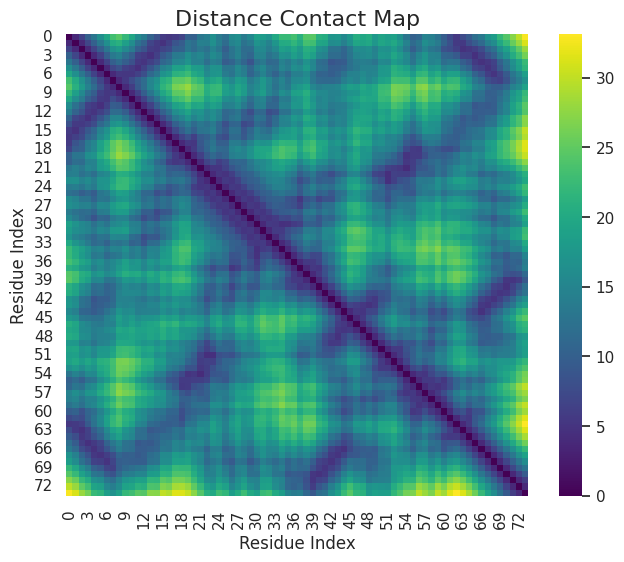

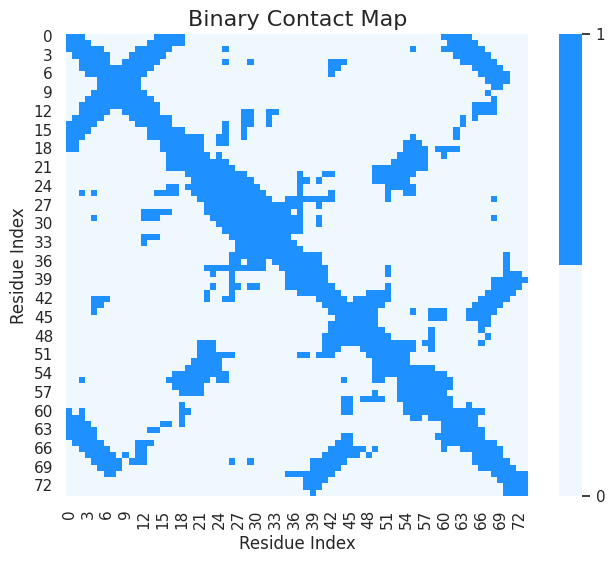

In [6]:
# Function to compute both binary and distance contact maps
def compute_contact_maps(coords, cutoff=10.0):
    n = len(coords)
    binary_contact_map = np.zeros((n, n))  # Binary contact map
    distance_contact_map = np.zeros((n, n))  # Distance contact map

    # Compute distance-based and binary contact maps
    for i in range(n):
        for j in range(i+1, n):
            dist = np.linalg.norm(coords[i] - coords[j])  # Compute Euclidean distance
            distance_contact_map[i, j] = distance_contact_map[j, i] = dist  # Fill in distances
            if dist < cutoff:  # Apply cutoff for binary contact map
                binary_contact_map[i, j] = binary_contact_map[j, i] = 1  # Symmetric binary contact map

    # Set diagonal elements to 1 (self contacts)
    np.fill_diagonal(binary_contact_map, 1)  # Each residue is in contact with itself

    return binary_contact_map, distance_contact_map

# Compute both contact maps using the coordinates
contact_map, distance_contact_map = compute_contact_maps(coords)

# Plot the binary contact map as a heatmap
def plot_binary_contact_map(contact_map):
    cmap = mcolors.ListedColormap(['aliceblue', 'dodgerblue'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(contact_map, cmap=cmap, cbar=True, square=True, vmin=0, vmax=1,
                cbar_kws={'ticks': [0, 1]})
    plt.title("Binary Contact Map", fontsize=16)
    plt.xlabel("Residue Index")
    plt.ylabel("Residue Index")
    plt.show()

# Plot the distance contact map as a heatmap
def plot_distance_contact_map(contact_map):
    plt.figure(figsize=(8, 6))
    sns.heatmap(contact_map, cmap="viridis", cbar=True, square=True)
    plt.title("Distance Contact Map", fontsize=16)
    plt.xlabel("Residue Index")
    plt.ylabel("Residue Index")
    plt.show()

# Call the functions to plot both contact maps
plot_distance_contact_map(distance_contact_map)
plot_binary_contact_map(contact_map)



Plot on top shows the heatmap of the pairwise distances among the 74 residues of Ubiquitin. Plot below shows a binary heatmap after applying a cut-off value of 10 Å. Pairs coloured in blue depict neighbouring residues.

## Experiment 1: ESM2 650M param

### Extract Attention Maps

In [7]:
# Format amino acid sequence to format required by ESM2
format_mapping = {
    'ALA': 'A', 'CYS': 'C', 'ASP': 'D', 'GLU': 'E',
    'PHE': 'F', 'GLY': 'G', 'HIS': 'H', 'ILE': 'I',
    'LYS': 'K', 'LEU': 'L', 'MET': 'M', 'ASN': 'N',
    'PRO': 'P', 'GLN': 'Q', 'ARG': 'R', 'SER': 'S',
    'THR': 'T', 'VAL': 'V', 'TRP': 'W', 'TYR': 'Y'
}

# Convert to single-letter codes
ubiquitin_sequence = ''.join(format_mapping[aa] for aa in pdb_seq)

# Output the result
print(ubiquitin_sequence)

LQIFVKTLTGKTITLEVEPSDTIENVKAKIQDKEGIPPDQQRLIFAGKQLEDGRTLSDYNIQKESTLHLVLRLR


In [8]:
# Load model
from transformers import AutoTokenizer, AutoModelForMaskedLM

tokenizer = AutoTokenizer.from_pretrained("facebook/esm2_t33_650M_UR50D") # Load tokenizer
model = AutoModelForMaskedLM.from_pretrained("facebook/esm2_t33_650M_UR50D") # Load model
model.eval()  # Set model to evaluation mode

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/95.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/93.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


config.json:   0%|          | 0.00/724 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.61G [00:00<?, ?B/s]

EsmForMaskedLM(
  (esm): EsmModel(
    (embeddings): EsmEmbeddings(
      (word_embeddings): Embedding(33, 1280, padding_idx=1)
      (dropout): Dropout(p=0.0, inplace=False)
      (position_embeddings): Embedding(1026, 1280, padding_idx=1)
    )
    (encoder): EsmEncoder(
      (layer): ModuleList(
        (0-32): 33 x EsmLayer(
          (attention): EsmAttention(
            (self): EsmSelfAttention(
              (query): Linear(in_features=1280, out_features=1280, bias=True)
              (key): Linear(in_features=1280, out_features=1280, bias=True)
              (value): Linear(in_features=1280, out_features=1280, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
              (rotary_embeddings): RotaryEmbedding()
            )
            (output): EsmSelfOutput(
              (dense): Linear(in_features=1280, out_features=1280, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
            (LayerNorm): LayerNorm((1280,), eps=1e-05, 

In [9]:
# Check tokenization format of the input sequence
inputs = tokenizer(ubiquitin_sequence, return_tensors="pt", padding=False)

# Print the token IDs and the decoded tokens
print("Token IDs:", inputs['input_ids'])
print("Decoded Tokens:", tokenizer.convert_ids_to_tokens(inputs['input_ids'][0]))


Token IDs: tensor([[ 0,  4, 16, 12, 18,  7, 15, 11,  4, 11,  6, 15, 11, 12, 11,  4,  9,  7,
          9, 14,  8, 13, 11, 12,  9, 17,  7, 15,  5, 15, 12, 16, 13, 15,  9,  6,
         12, 14, 14, 13, 16, 16, 10,  4, 12, 18,  5,  6, 15, 16,  4,  9, 13,  6,
         10, 11,  4,  8, 13, 19, 17, 12, 16, 15,  9,  8, 11,  4, 21,  4,  7,  4,
         10,  4, 10,  2]])
Decoded Tokens: ['<cls>', 'L', 'Q', 'I', 'F', 'V', 'K', 'T', 'L', 'T', 'G', 'K', 'T', 'I', 'T', 'L', 'E', 'V', 'E', 'P', 'S', 'D', 'T', 'I', 'E', 'N', 'V', 'K', 'A', 'K', 'I', 'Q', 'D', 'K', 'E', 'G', 'I', 'P', 'P', 'D', 'Q', 'Q', 'R', 'L', 'I', 'F', 'A', 'G', 'K', 'Q', 'L', 'E', 'D', 'G', 'R', 'T', 'L', 'S', 'D', 'Y', 'N', 'I', 'Q', 'K', 'E', 'S', 'T', 'L', 'H', 'L', 'V', 'L', 'R', 'L', 'R', '<eos>']


In [10]:
# Function to compute attention scores from the model
def compute_attention_scores(model, tokenizer, sequence):
    # Tokenize the input sequence
    inputs = tokenizer(sequence, return_tensors="pt", padding=False)

    # Get outputs from the model
    with torch.no_grad():
        outputs = model(**inputs, output_attentions=True)

    # Extract the attention scores from all layers and heads
    attentions = outputs.attentions  # This is a list of attention tensors for each layer
    return attentions

# Get attention scores
attention_scores = compute_attention_scores(model, tokenizer, ubiquitin_sequence)


Maximum Attention Score: 1.0
Minimum Attention Score: 4.9098665143011995e-17
Mean Attention Score: 0.0132
Median Attention Score: 0.0047
Standard Deviation: 0.0450
25th Percentile (Q1): 0.0012
75th Percentile (Q3): 0.0113


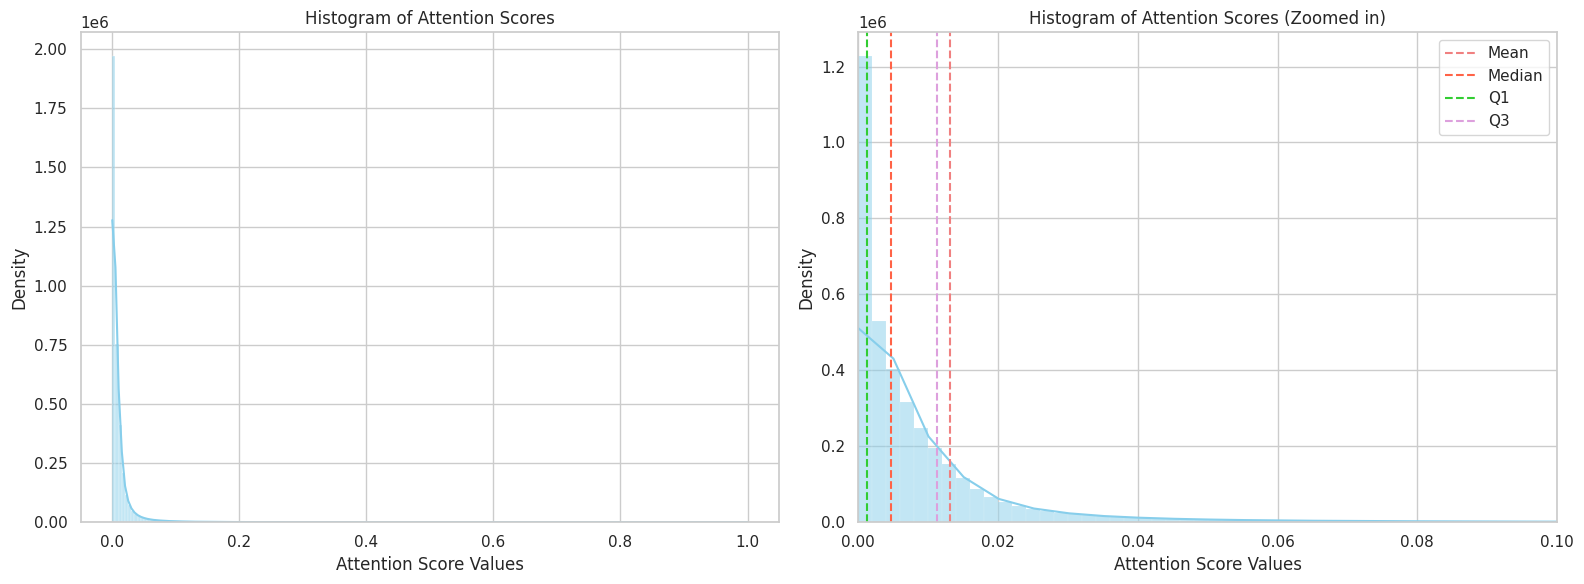

In [11]:
# Flatten the attention scores for histogram
all_attention_values = []
for layer_att in attention_scores:
    all_attention_values.append(layer_att.flatten().cpu().numpy())

# Concatenate values from all layers
all_attention_values = np.concatenate(all_attention_values)

# Calculate statistical information
max_attention_value = np.max(all_attention_values)
min_attention_value = np.min(all_attention_values)
mean_attention_value = np.mean(all_attention_values)
median_attention_value = np.median(all_attention_values)
std_attention_value = np.std(all_attention_values)
q1_attention_value = np.percentile(all_attention_values, 25)
q3_attention_value = np.percentile(all_attention_values, 75)

# Print the statistical information
print(f"Maximum Attention Score: {max_attention_value}")
print(f"Minimum Attention Score: {min_attention_value}")
print(f"Mean Attention Score: {mean_attention_value:.4f}")
print(f"Median Attention Score: {median_attention_value:.4f}")
print(f"Standard Deviation: {std_attention_value:.4f}")
print(f"25th Percentile (Q1): {q1_attention_value:.4f}")
print(f"75th Percentile (Q3): {q3_attention_value:.4f}")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the first histogram without additional information
sns.histplot(all_attention_values, bins=200, color='skyblue', kde=True, ax=axes[0])
axes[0].set_title('Histogram of Attention Scores')
axes[0].set_xlabel('Attention Score Values')
axes[0].set_ylabel('Density')

# Plot the second histogram with x-limit and statistical lines
sns.histplot(all_attention_values, bins=500, color='skyblue', kde=True, ax=axes[1])
axes[1].set_xlim(0, 0.1)
axes[1].set_title('Histogram of Attention Scores (Zoomed in)')
axes[1].set_xlabel('Attention Score Values')
axes[1].set_ylabel('Density')
axes[1].axvline(mean_attention_value, color='lightcoral', linestyle='--', label='Mean')
axes[1].axvline(median_attention_value, color='tomato', linestyle='--', label='Median')
axes[1].axvline(q1_attention_value, color='limegreen', linestyle='--', label='Q1')
axes[1].axvline(q3_attention_value, color='plum', linestyle='--', label='Q3')
axes[1].legend()

plt.tight_layout()
plt.show()


### Correlate High-Attention Pairs with Contact Map

In order to compute the proportion of high attention pairs in contact we first need to select a threshold to differentiate high attention vs low attention pairs.

We could select the threshold that maximizes the number of high attention pairs in contact, nevertheless, relying solely on the metric of precision (the accuracy of high-attention pairs that are predicted to be in contact) could lead to having a low recall (how well the high-attention pairs cover the actual contact map). Moreover, it is also importanto to evaluate specificity (the proportion of low-attention pairs that are correctly not in contact).

Based on these requirements, we will compute the following metrics: precision, recall, F1 score and specificity.

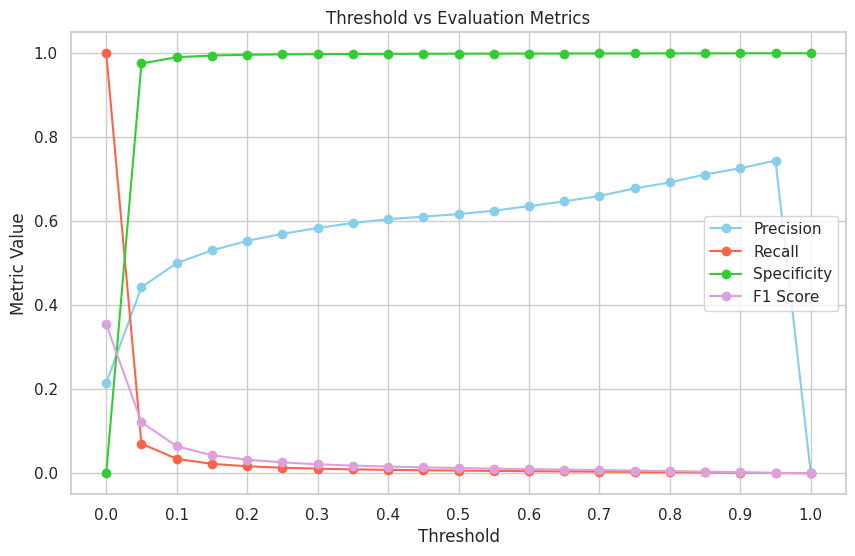

In [12]:
def evaluate_thresholds(attention_scores, contact_map, thresholds):
    n_layers = len(attention_scores)
    results = {
        "thresholds": thresholds,
        "precision": [],
        "recall": [],
        "specificity": [],
        "f1_score": [],
        "f2_score": []
    }

    start_idx = 1  # Skip the <cls> token
    end_idx = 75   # Only go up to the last amino acid (excluding <eos>)

    for threshold in thresholds:
        tp, fp, tn, fn = 0, 0, 0, 0

        for layer_idx in range(n_layers):
            layer_att = attention_scores[layer_idx]
            num_heads = layer_att.size(1)

            for head_idx in range(num_heads):
                att_matrix = layer_att[0, head_idx].cpu().numpy()
                att_matrix = att_matrix[start_idx:end_idx, start_idx:end_idx]

                # Define high attention pairs at current threshold
                high_attention_pairs = att_matrix > threshold

                # Flatten matrices for TP, FP, TN, FN calculations
                high_attention_pairs = high_attention_pairs.flatten()
                # Convert contact_map to a boolean array to ensure compatibility
                contact_map_flat = (contact_map.flatten() > 0)  # Assumes contact_map entries are > 0 for contacts

                tp += np.sum(high_attention_pairs & contact_map_flat)  # True Positives
                fp += np.sum(high_attention_pairs & ~contact_map_flat) # False Positives
                tn += np.sum(~high_attention_pairs & ~contact_map_flat) # True Negatives
                fn += np.sum(~high_attention_pairs & contact_map_flat)  # False Negatives

        # Calculate metrics for current threshold
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Store results
        results["precision"].append(precision)
        results["recall"].append(recall)
        results["specificity"].append(specificity)
        results["f1_score"].append(f1_score)

    return results

# Plotting
thresholds = np.linspace(0, 1, 21)  # From 0.0 to 1.0 with 21 steps
results = evaluate_thresholds(attention_scores, contact_map, thresholds)

plt.figure(figsize=(10, 6))

# Plot Precision, Recall, Specificity, F1, and F2 scores
plt.plot(thresholds, results["precision"], label="Precision", marker='o', linestyle='-', color='skyblue')
plt.plot(thresholds, results["recall"], label="Recall", marker='o', linestyle='-', color='tomato')
plt.plot(thresholds, results["specificity"], label="Specificity", marker='o', linestyle='-', color='limegreen')
plt.plot(thresholds, results["f1_score"], label="F1 Score", marker='o', linestyle='-', color='plum')
plt.title('Threshold vs Evaluation Metrics')
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.show()


The range of interest is 0-0.1 (where precision and recall lines cross), thus, we focus on this range to select the optimal threshold value.

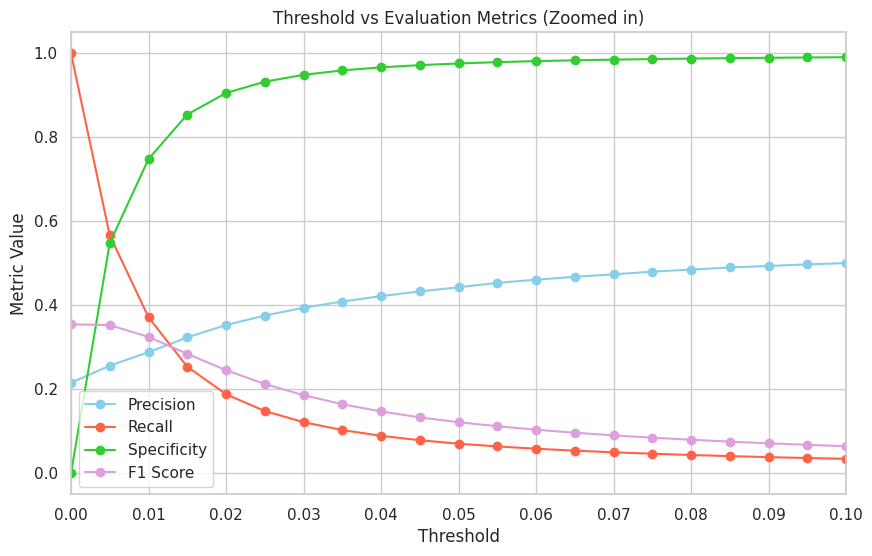

In [13]:
# Plotting
thresholds = np.linspace(0, 0.1, 21)  # From 0.0 to 0.1 with 21 steps
results = evaluate_thresholds(attention_scores, contact_map, thresholds)

plt.figure(figsize=(10, 6))

# Plot Precision, Recall, Specificity, F1, and F2 scores
plt.plot(thresholds, results["precision"], label="Precision", marker='o', linestyle='-', color='skyblue')
plt.plot(thresholds, results["recall"], label="Recall", marker='o', linestyle='-', color='tomato')
plt.plot(thresholds, results["specificity"], label="Specificity", marker='o', linestyle='-', color='limegreen')
plt.plot(thresholds, results["f1_score"], label="F1 Score", marker='o', linestyle='-', color='plum')
plt.title('Threshold vs Evaluation Metrics (Zoomed in)')
plt.xlim(0, 0.1)
plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(np.arange(0, 0.11, 0.01))
plt.show()

Based on the F1 Score and precision-recall balance, a threshold around 0.01 to 0.02 would be a good choice. This threshold provides a reasonable balance between precision and recall without sacrificing too many true positives.

Selecting a threshold of about 0.01 to 0.02 would therefore maximize the likelihood of capturing true contact pairs while maintaining acceptable precision. Moreover,  0.0113 is the 75th percentile (Q3 value) of the attention score distribution, this is a value that captures the top 25% of the attention scores.

Based on this results, we select 0.015 as a threshold value to determine if a attention value is high or not.

In [14]:
# Function to analyze attention scores and contact map
def analyze_attention_with_contact(attention_scores, contact_map, threshold=0.015):
    n_layers = len(attention_scores)
    results = []

    # Define the range to ignore special tokens
    start_idx = 1  # Skip the <cls> token
    end_idx = 75   # Only go up to the last amino acid (excluding <eos>)

    for layer_idx in range(n_layers):
        layer_att = attention_scores[layer_idx]  # Shape: (batch_size, num_heads, seq_len, seq_len)
        num_heads = layer_att.size(1)  # Number of attention heads

        for head_idx in range(num_heads):
            att_matrix = layer_att[0, head_idx].cpu().numpy()  # Get the attention matrix for this head

            # Slice the attention matrix to ignore special tokens
            att_matrix = att_matrix[start_idx:end_idx, start_idx:end_idx]  # Shape: (74, 74)

            # Identify high attention pairs
            high_attention_pairs = att_matrix > threshold

            # Calculate the proportion of high-attention pairs that are in contact
            total_high_attention_pairs = np.sum(high_attention_pairs)
            contact_pairs = np.sum(high_attention_pairs * contact_map)

            if total_high_attention_pairs > 0:
                proportion_contact = contact_pairs / total_high_attention_pairs
            else:
                proportion_contact = 0

            results.append((layer_idx, head_idx, proportion_contact))

    return results

# Analyze the attention scores with the contact map
attention_contact_results = analyze_attention_with_contact(attention_scores, contact_map, threshold=0.015)

# Print results
for layer_idx, head_idx, proportion in attention_contact_results:
    print(f"Layer: {layer_idx}, Head: {head_idx}, Proportion of High Attention in Contact: {proportion:.4f}")


Layer: 0, Head: 0, Proportion of High Attention in Contact: 0.2137
Layer: 0, Head: 1, Proportion of High Attention in Contact: 0.2443
Layer: 0, Head: 2, Proportion of High Attention in Contact: 0.1968
Layer: 0, Head: 3, Proportion of High Attention in Contact: 0.2840
Layer: 0, Head: 4, Proportion of High Attention in Contact: 0.1976
Layer: 0, Head: 5, Proportion of High Attention in Contact: 0.2312
Layer: 0, Head: 6, Proportion of High Attention in Contact: 0.2466
Layer: 0, Head: 7, Proportion of High Attention in Contact: 0.2810
Layer: 0, Head: 8, Proportion of High Attention in Contact: 0.2839
Layer: 0, Head: 9, Proportion of High Attention in Contact: 0.4060
Layer: 0, Head: 10, Proportion of High Attention in Contact: 0.2125
Layer: 0, Head: 11, Proportion of High Attention in Contact: 0.2198
Layer: 0, Head: 12, Proportion of High Attention in Contact: 0.2223
Layer: 0, Head: 13, Proportion of High Attention in Contact: 0.2349
Layer: 0, Head: 14, Proportion of High Attention in Contac

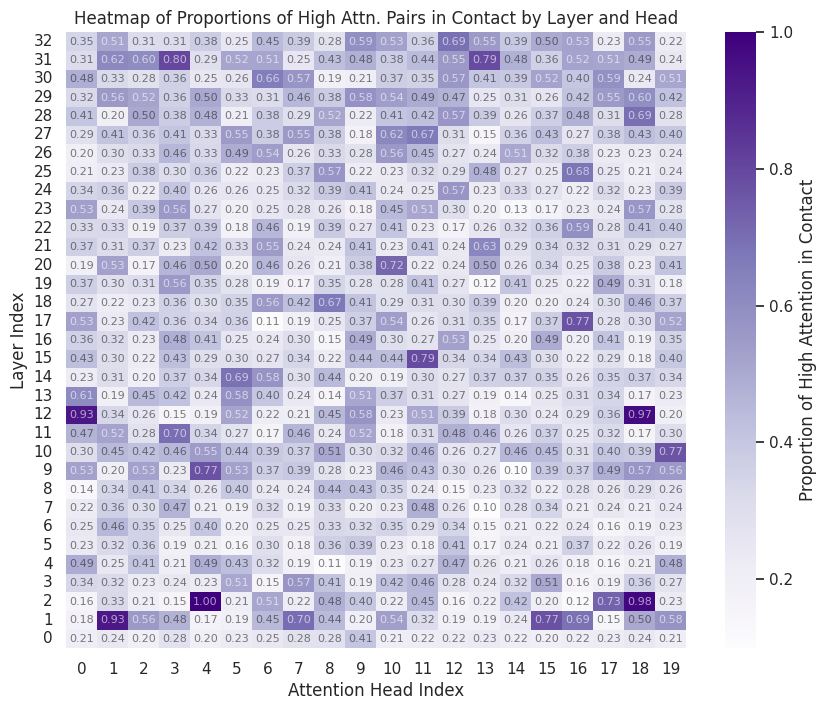

In [15]:
# Prepare data for heatmap
layers = [result[0] for result in attention_contact_results]
heads = [result[1] for result in attention_contact_results]

num_layers = max(layers) + 1
num_heads = max(heads) + 1

# Initialize a matrix to hold proportions
heatmap_data = np.zeros((num_layers, num_heads))

# Fill the heatmap data
for layer, head, proportion in attention_contact_results:
    heatmap_data[layer, head] = proportion

# Calculate average proportion per layer and per head
average_attention_per_layer = heatmap_data.mean(axis=1)
average_attention_per_head = heatmap_data.mean(axis=0)

# Calculate max proportion per layer and per head
max_attention_per_layer = heatmap_data.max(axis=1)
max_attention_per_head = heatmap_data.max(axis=0)

# Heatmap of proportion Proportions by Layer and Head
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='Purples', annot=True, fmt='.2f',
            cbar_kws={'label': 'Proportion of High Attention in Contact'},
            annot_kws={'size': 8, 'alpha': 0.6})
plt.xlabel('Attention Head Index')
plt.ylabel('Layer Index')
plt.title('Heatmap of Proportions of High Attn. Pairs in Contact by Layer and Head')
plt.xticks(ticks=np.arange(num_heads) + 0.5, labels=np.arange(num_heads))
plt.yticks(ticks=np.arange(num_layers) + 0.5, labels=np.arange(num_layers))
plt.gca().invert_yaxis()
plt.show()


Proportion of high attention pairs in contact follows an upward trends as the layer number increases. Regarding the correlation among the attention heads, there does not seem to be a significant difference.

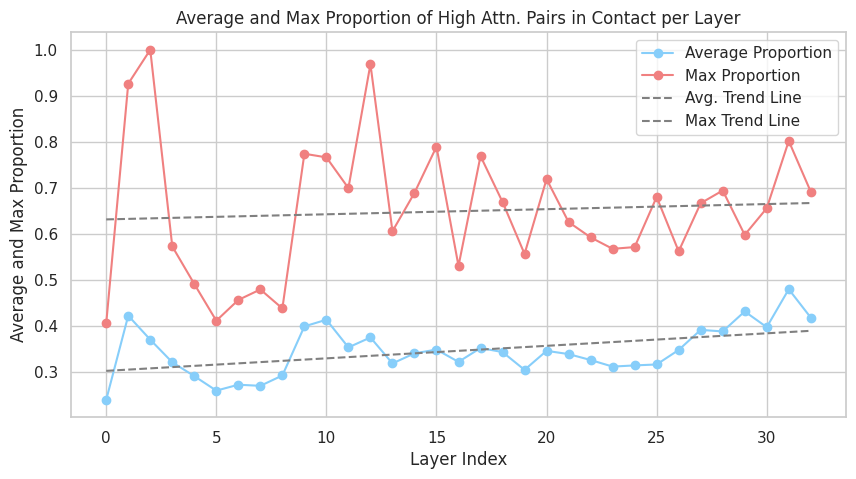

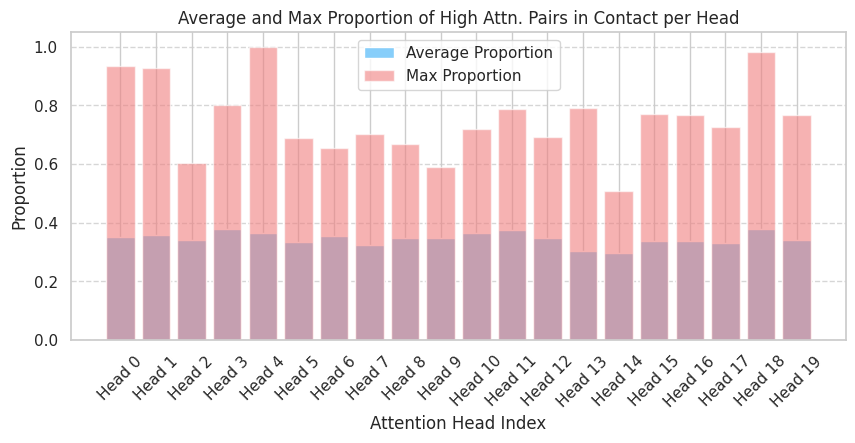

In [16]:
# Average and Max Proportion per Layer with Trend Line
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_layers), average_attention_per_layer, marker='o', color='lightskyblue', label='Average Proportion')
plt.plot(np.arange(num_layers), max_attention_per_layer, marker='o', color='lightcoral', label='Max Proportion')

# Fit a linear trend line
layer_trend = np.polyfit(np.arange(num_layers), average_attention_per_layer, 1)
plt.plot(np.arange(num_layers), np.polyval(layer_trend, np.arange(num_layers)), color='gray', linestyle='--', label='Avg. Trend Line')

# Fit a linear trend line
layer_trend = np.polyfit(np.arange(num_layers), max_attention_per_layer, 1)
plt.plot(np.arange(num_layers), np.polyval(layer_trend, np.arange(num_layers)), color='gray', linestyle='--', label='Max Trend Line')

plt.xlabel('Layer Index')
plt.ylabel('Average and Max Proportion')
plt.title('Average and Max Proportion of High Attn. Pairs in Contact per Layer')
plt.legend()
plt.grid(True)
plt.show()

# Plot Average and Max Proportion per Head
plt.figure(figsize=(10, 4))
plt.bar(np.arange(num_heads), average_attention_per_head, color='lightskyblue', label='Average Proportion')
plt.bar(np.arange(num_heads), max_attention_per_head, color='lightcoral', alpha=0.6, label='Max Proportion')
plt.xlabel('Attention Head Index')
plt.ylabel('Proportion')
plt.title('Average and Max Proportion of High Attn. Pairs in Contact per Head')
plt.xticks(ticks=np.arange(num_heads), labels=[f'Head {i}' for i in range(num_heads)], rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.show()


In [17]:
def plot_attention_maps(attention_scores, contact_map, layer_index, head_index, threshold=0.015):
    # Define the range to ignore special tokens
    start_idx = 1  # Skip the <cls> token
    end_idx = 75   # Only go up to the last amino acid (excluding <eos>)

    # Get the attention matrix for the specified head from the specified layer
    attention_matrix = attention_scores[layer_index][0, head_index].cpu().numpy()

    # Slice the attention matrix to ignore special tokens
    att_matrix = attention_matrix[start_idx:end_idx, start_idx:end_idx]  # Shape: (74, 74)

    # Create binary attention map by applying the threshold
    binary_attention_map = (att_matrix > threshold).astype(float)

    # Create a combined map to visualize interactions
    combined_map = np.zeros_like(binary_attention_map)

    # Set values based on the conditions
    combined_map[(contact_map == 1) & (binary_attention_map == 1)] = 3  # Both 1
    combined_map[(contact_map == 1) & (binary_attention_map == 0)] = 1  # Contact map 1
    combined_map[(contact_map == 0) & (binary_attention_map == 1)] = 2  # Attention map 1

    # Create color map for the combined visualization
    cmap_combined = mcolors.ListedColormap(['whitesmoke', 'dodgerblue', 'lightcoral', 'lightgreen'])

    # Plotting the matrices
    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Plot original contact map (using the sliced range)
    cmap = mcolors.ListedColormap(['aliceblue', 'dodgerblue'])
    sns.heatmap(contact_map, ax=axes[0], cmap=cmap, cbar=True)
    axes[0].set_title("Contact Map")
    axes[0].set_xlabel("Residue Index")
    axes[0].set_ylabel("Residue Index")

    # Plot binary attention map
    cmap2 = mcolors.ListedColormap(['seashell', 'lightcoral'])
    sns.heatmap(binary_attention_map, ax=axes[1], cmap=cmap2, cbar=True)
    axes[1].set_title("Binary Attention Map (Threshold 0.015)")
    axes[1].set_xlabel("Residue Index")
    axes[1].set_ylabel("Residue Index")

    # Plot combined map
    sns.heatmap(combined_map, ax=axes[2], cmap=cmap_combined, cbar=True, vmin=0, vmax=3)
    axes[2].set_title("Combined Contact and Attention Map")
    axes[2].set_xlabel("Residue Index")
    axes[2].set_ylabel("Residue Index")

    # Create colorbar labels for the combined map
    cbar_labels = ['None', 'Contact Map', 'Attention Map', 'Contact + Attn.']
    cbar = axes[2].collections[0].colorbar
    cbar.set_ticks([0.5, 1.25, 2, 2.75])
    cbar.set_ticklabels(cbar_labels)

    plt.tight_layout()
    plt.show()


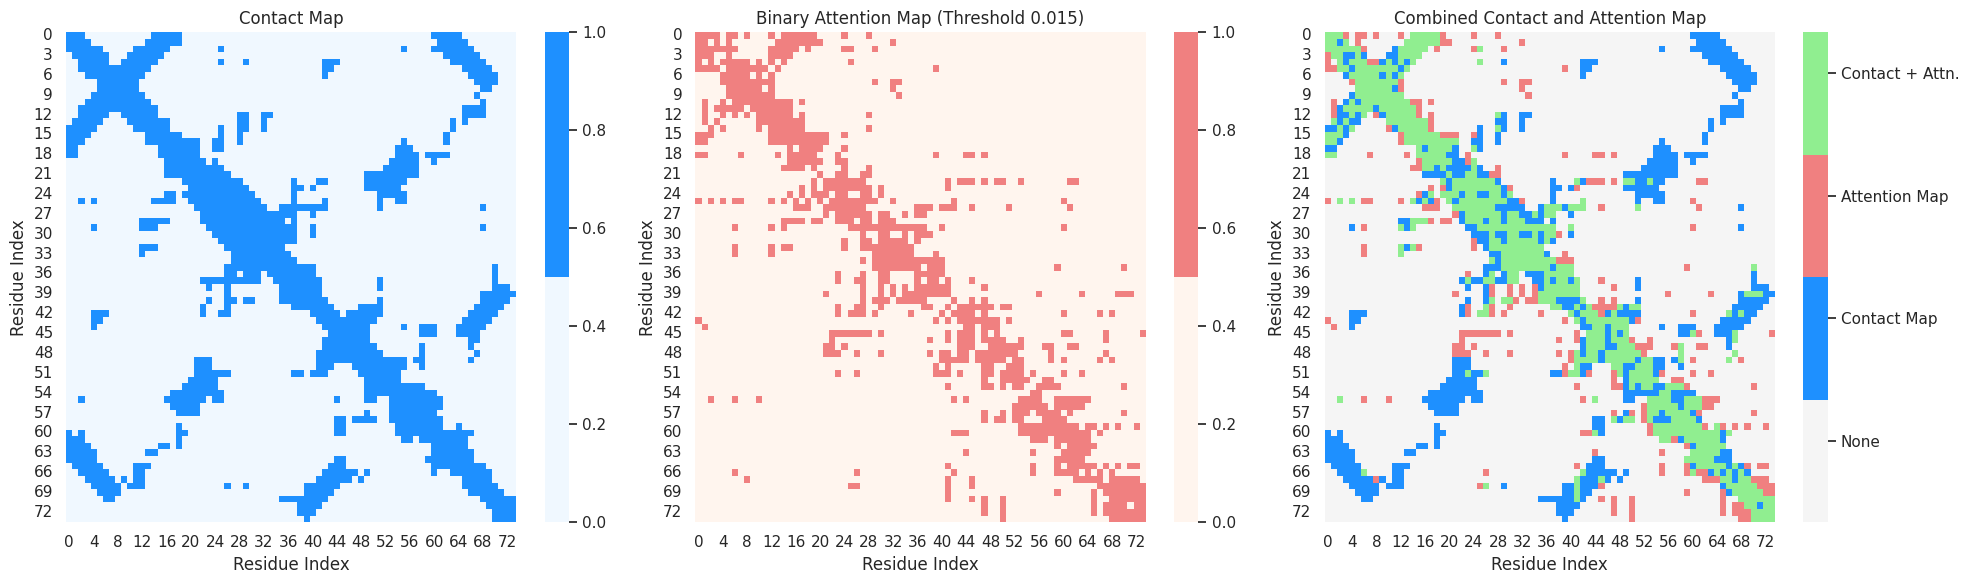

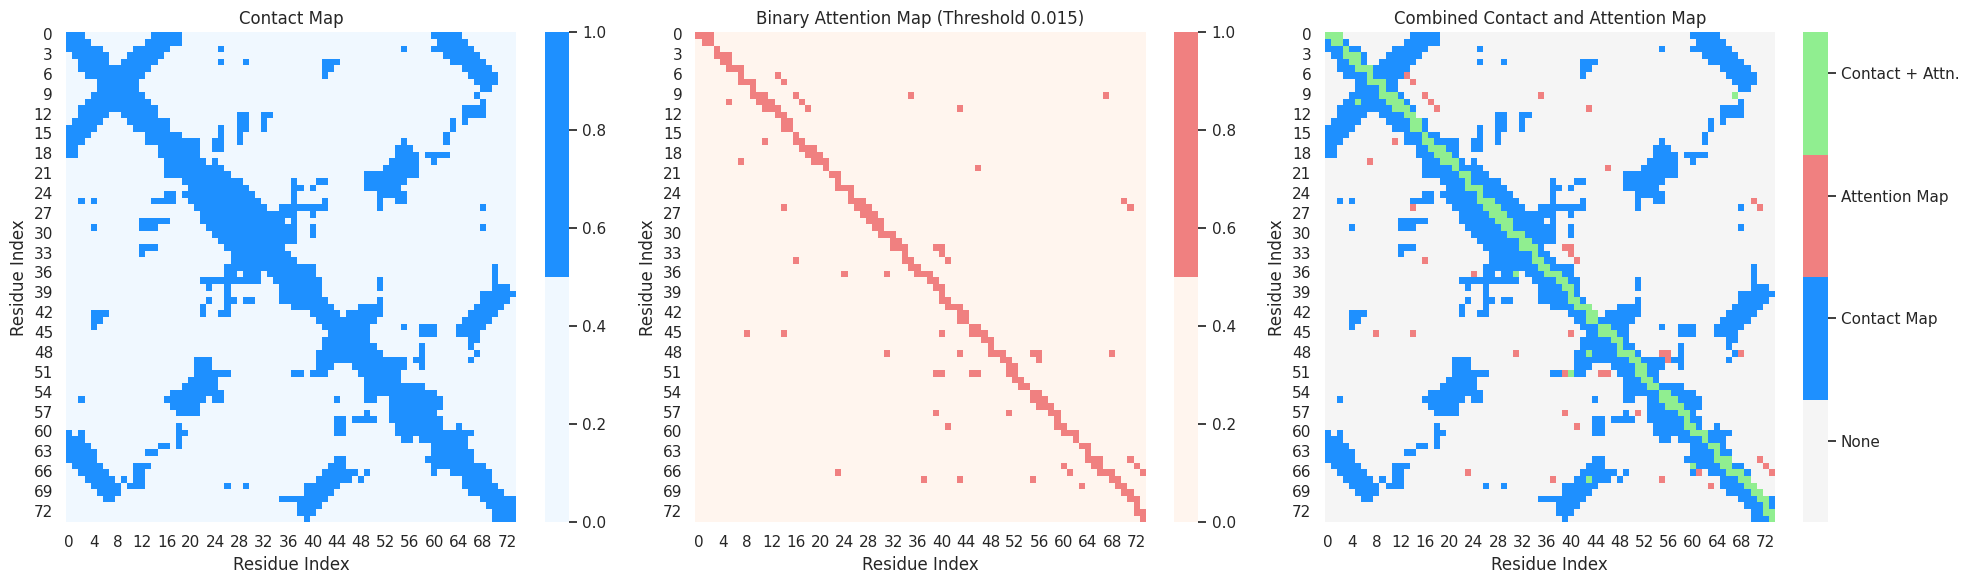

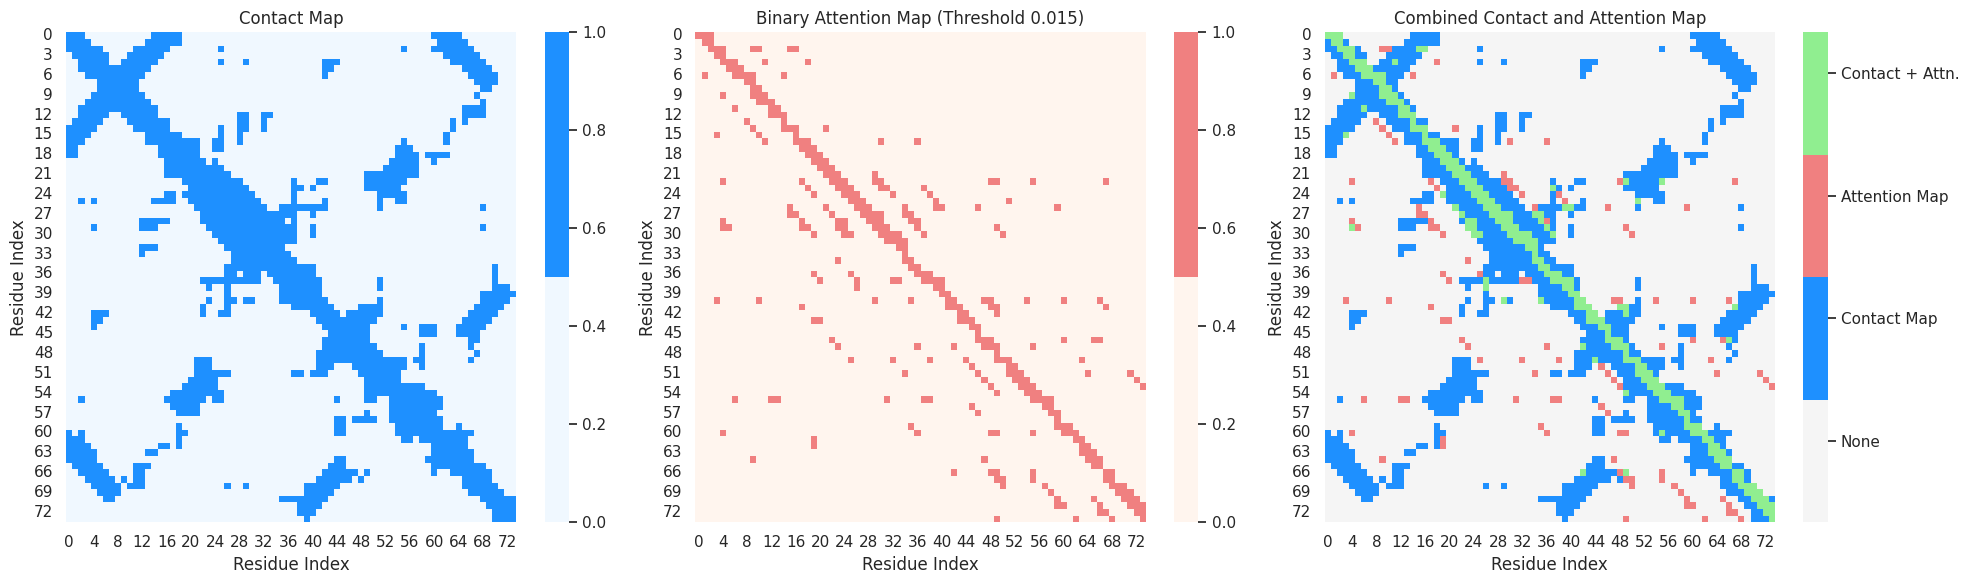

In [18]:
# Plot maps with high correlation from last layers
plot_attention_maps(attention_scores, contact_map, layer_index=32, head_index=12)
plot_attention_maps(attention_scores, contact_map, layer_index=31, head_index=3)
plot_attention_maps(attention_scores, contact_map, layer_index=25, head_index=16)


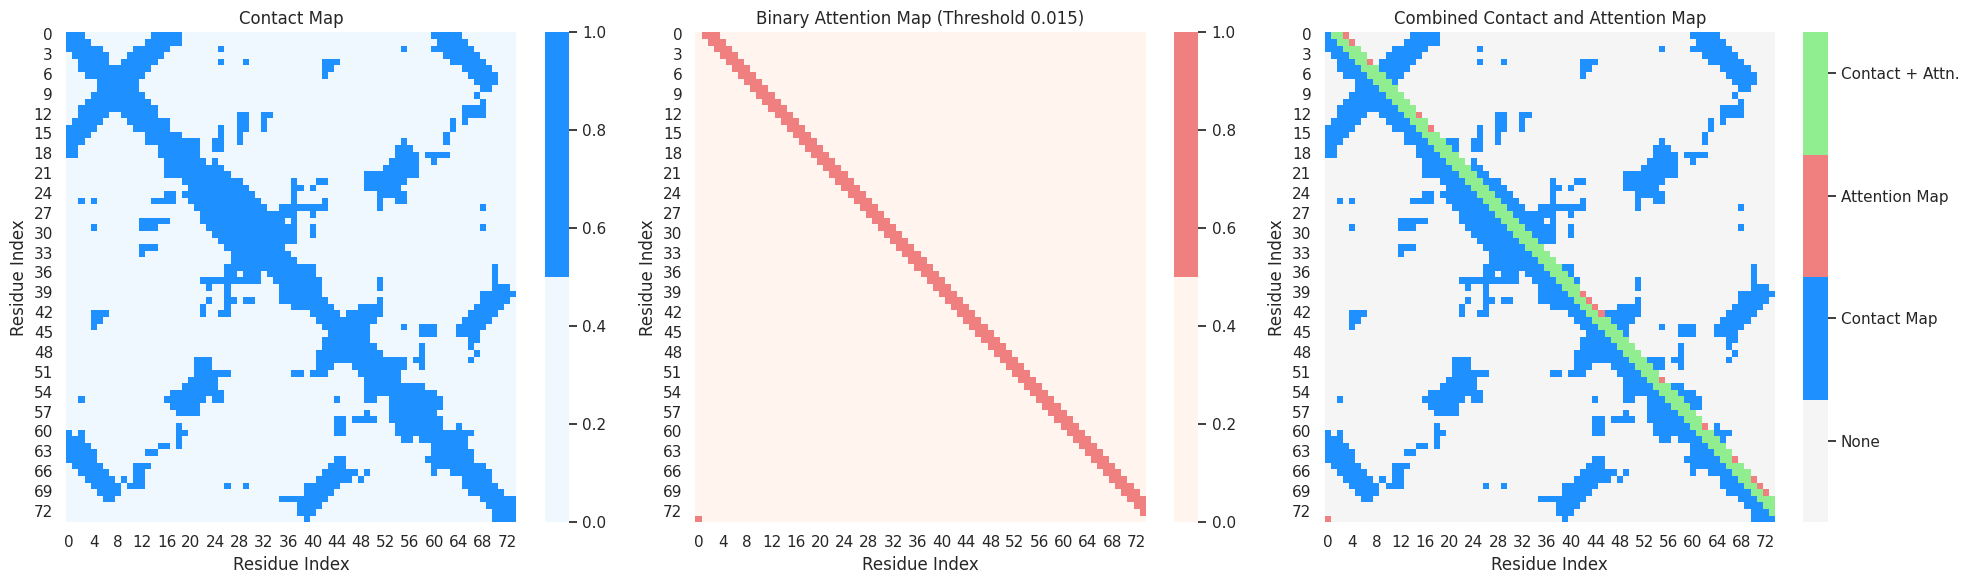

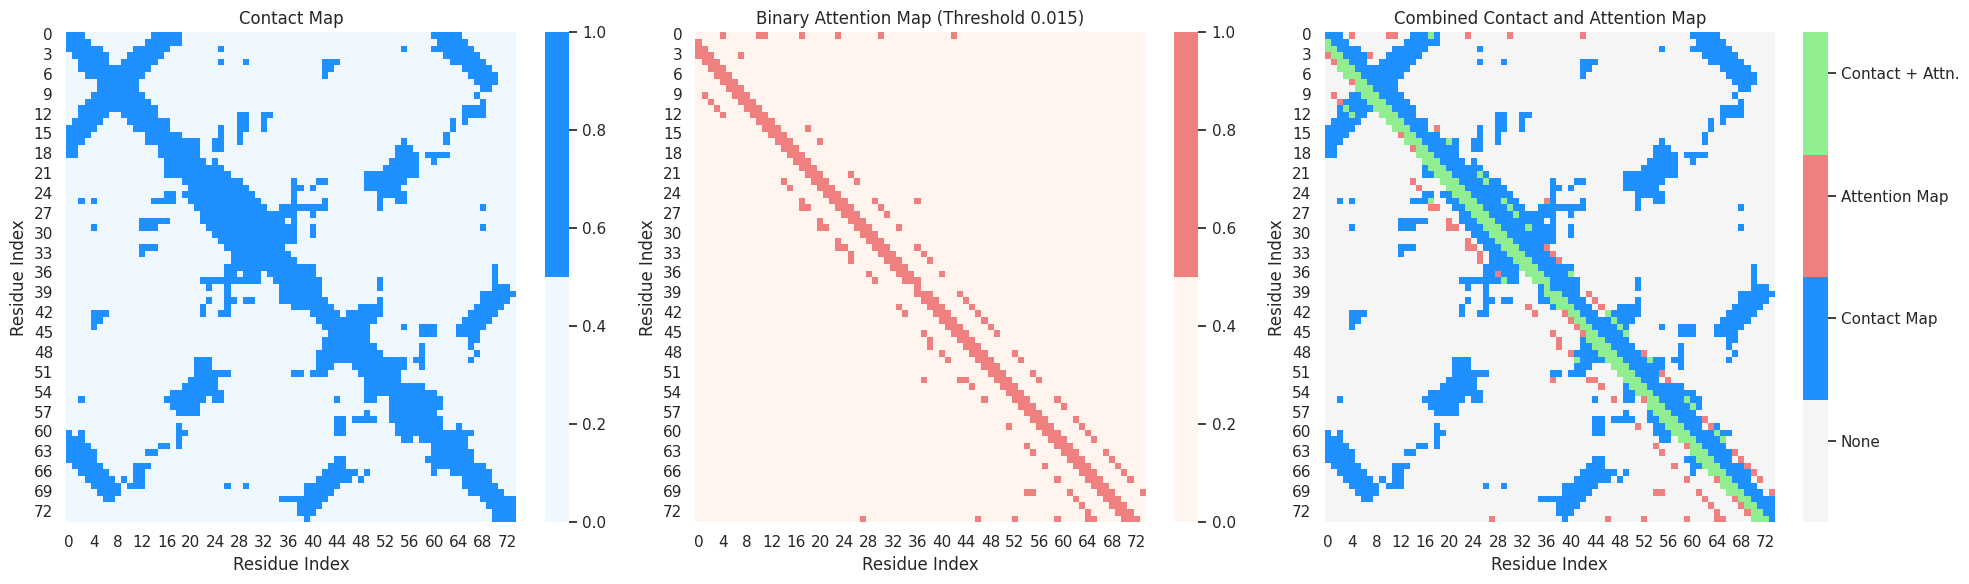

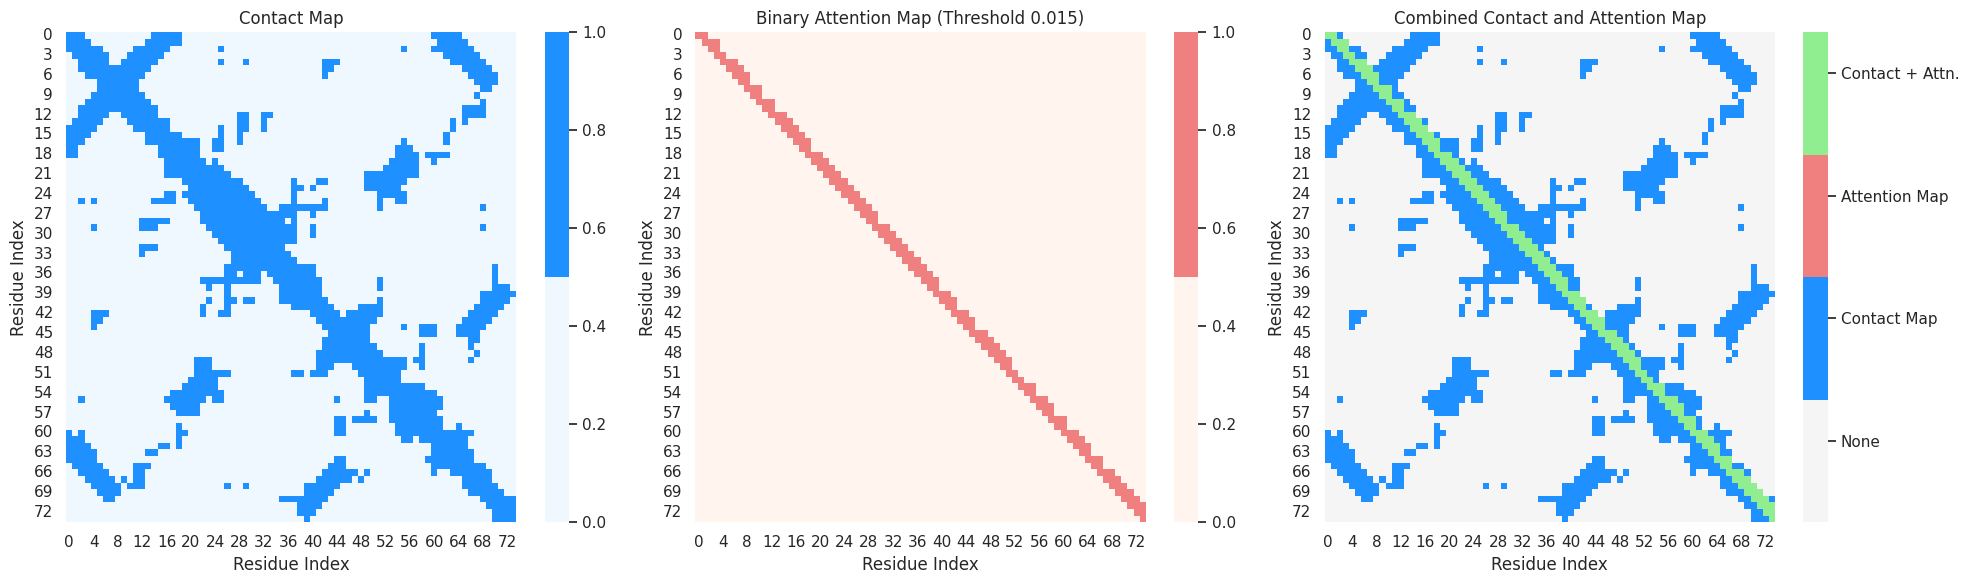

In [19]:
# Plot maps with high correlation from first layers
plot_attention_maps(attention_scores, contact_map, layer_index=1, head_index=1)
plot_attention_maps(attention_scores, contact_map, layer_index=2, head_index=17)
plot_attention_maps(attention_scores, contact_map, layer_index=2, head_index=4)


In [ ]:
import imageio
import random

# Create gif
def plot_attention_maps(attention_scores, contact_map, layer_index, head_index, threshold=0.015):
    # Define the range to ignore special tokens
    start_idx = 1  # Skip the <cls> token
    end_idx = 75   # Only go up to the last amino acid (excluding <eos>)

    # Get the attention matrix for the specified head from the specified layer
    attention_matrix = attention_scores[layer_index][0, head_index].cpu().numpy()

    # Slice the attention matrix to ignore special tokens
    att_matrix = attention_matrix[start_idx:end_idx, start_idx:end_idx]  # Shape: (74, 74)

    # Create binary attention map by applying the threshold
    binary_attention_map = (att_matrix > threshold).astype(float)

    # Create a combined map to visualize interactions
    combined_map = np.zeros_like(binary_attention_map)

    # Set values based on the conditions
    combined_map[(contact_map == 1) & (binary_attention_map == 1)] = 3  # Both 1
    combined_map[(contact_map == 1) & (binary_attention_map == 0)] = 1  # Contact map 1
    combined_map[(contact_map == 0) & (binary_attention_map == 1)] = 2  # Attention map 1

    # Create color map for the combined visualization
    cmap_combined = mcolors.ListedColormap(['whitesmoke', 'dodgerblue', 'lightcoral', 'lightgreen'])

    # Create the plot for the combined map
    plt.figure(figsize=(8, 6))
    heatmap = sns.heatmap(combined_map, cmap=cmap_combined, cbar=True, vmin=0, vmax=3)

    # Create colorbar labels for the combined map
    cbar_labels = ['None', 'Contact Map', 'Attention Map', 'Contact + Attn.']
    cbar = heatmap.collections[0].colorbar
    cbar.set_ticks([0.5, 1.25, 2, 2.75])  # Set colorbar ticks
    cbar.set_ticklabels(cbar_labels)  # Set colorbar labels

    plt.title(f"Combined Contact and Attention Map (Layer {layer_index}, Head {head_index})")
    plt.xlabel("Residue Index")
    plt.ylabel("Residue Index")

    # Save the figure as a PNG file
    plt.savefig(f"images/layer_{layer_index}_head_{head_index}.png")
    plt.close()  # Close the plot to avoid display during generation

def create_gif(attention_scores, contact_map, num_layers=32, threshold=0.015):
    images = []

    for layer_index in range(num_layers):
        head_index = random.randint(0, attention_scores[layer_index].size(1) - 1)  # Random head index
        plot_attention_maps(attention_scores, contact_map, layer_index, head_index, threshold)
        # Load the saved image and append it to the images list
        images.append(imageio.imread(f"images/layer_{layer_index}_head_{head_index}.png"))

    # Create a GIF from the images
    imageio.mimsave('gifs/combined_attention_maps.gif', images, duration=10)

# Example usage (ensure attention_scores and contact_map are defined in your context)
create_gif(attention_scores, contact_map)


<ipython-input-148-a0b45d84d290>:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"images2/layer_{layer_index}_head_{head_index}.png"))
<ipython-input-148-a0b45d84d290>:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(f"images2/layer_{layer_index}_head_{head_index}.png"))
<ipython-input-148-a0b45d84d290>:54: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call 

# Conclusions

Plot below shows a heatmap of the proportion of high attention residue pairs in contact, layer-wise and head-wise.

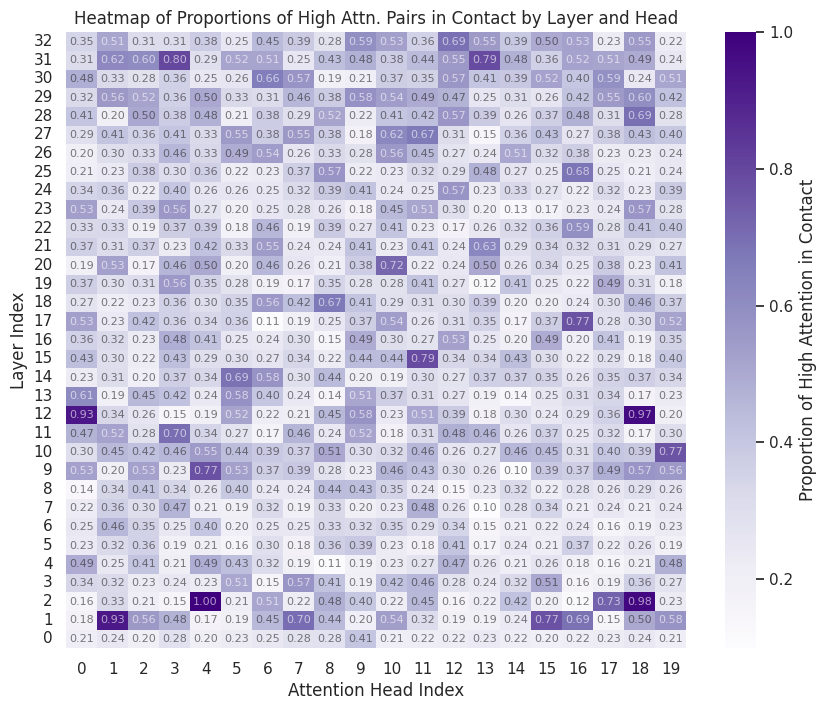

- The average proportion of high attention pairs in contact demonstrates an upward trend as the layer number of the transformer model increases. This observation aligns with the expectation that the later layers are better at capturing fine-grained patterns, which suggests that they encode more complex spatial relationships among amino acids. As the model deepens, it appears to improve its understanding of the structural context within the proteins.

- In contrast, the proportion among different attention heads remains relatively stable, with average proportions consistently falling between 30% and 35%. This indicates that while the overall representation of relationships improves with deeper layers, the variability in attention among individual heads does not significantly change. This may suggest that the attention heads are learning complementary features, rather than diverging significantly in their interpretations of the data.

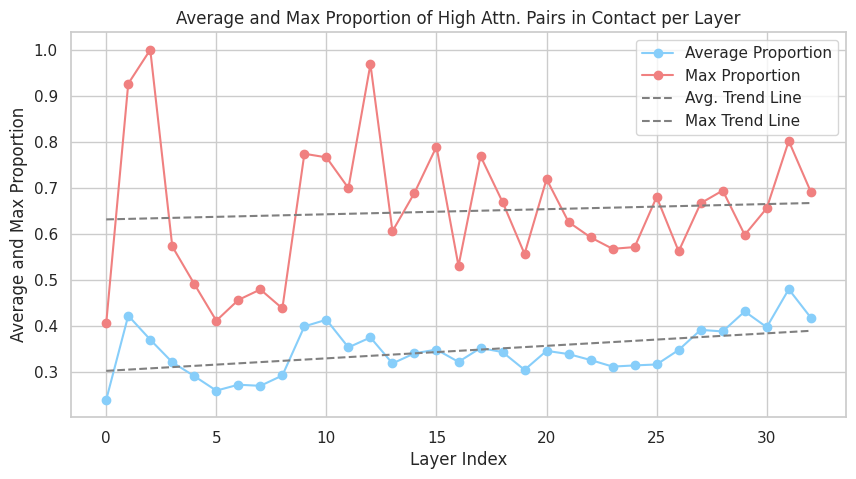

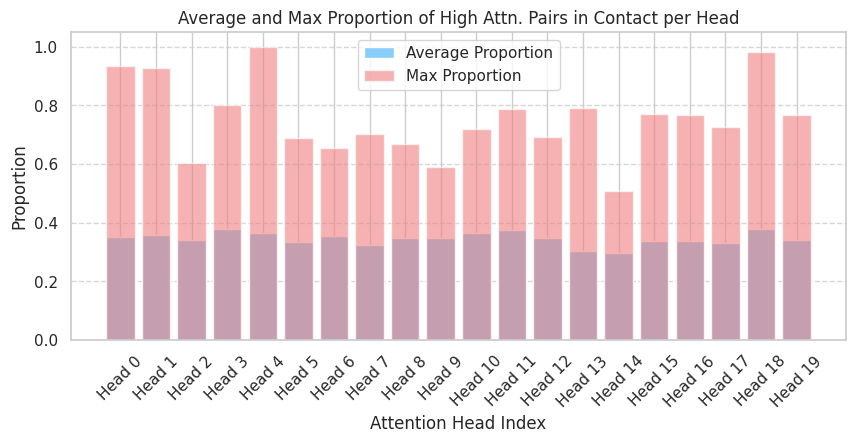

Visualization of the contact map, attention map for a specific layer and head (layer 32, head 12) and combination of both maps.

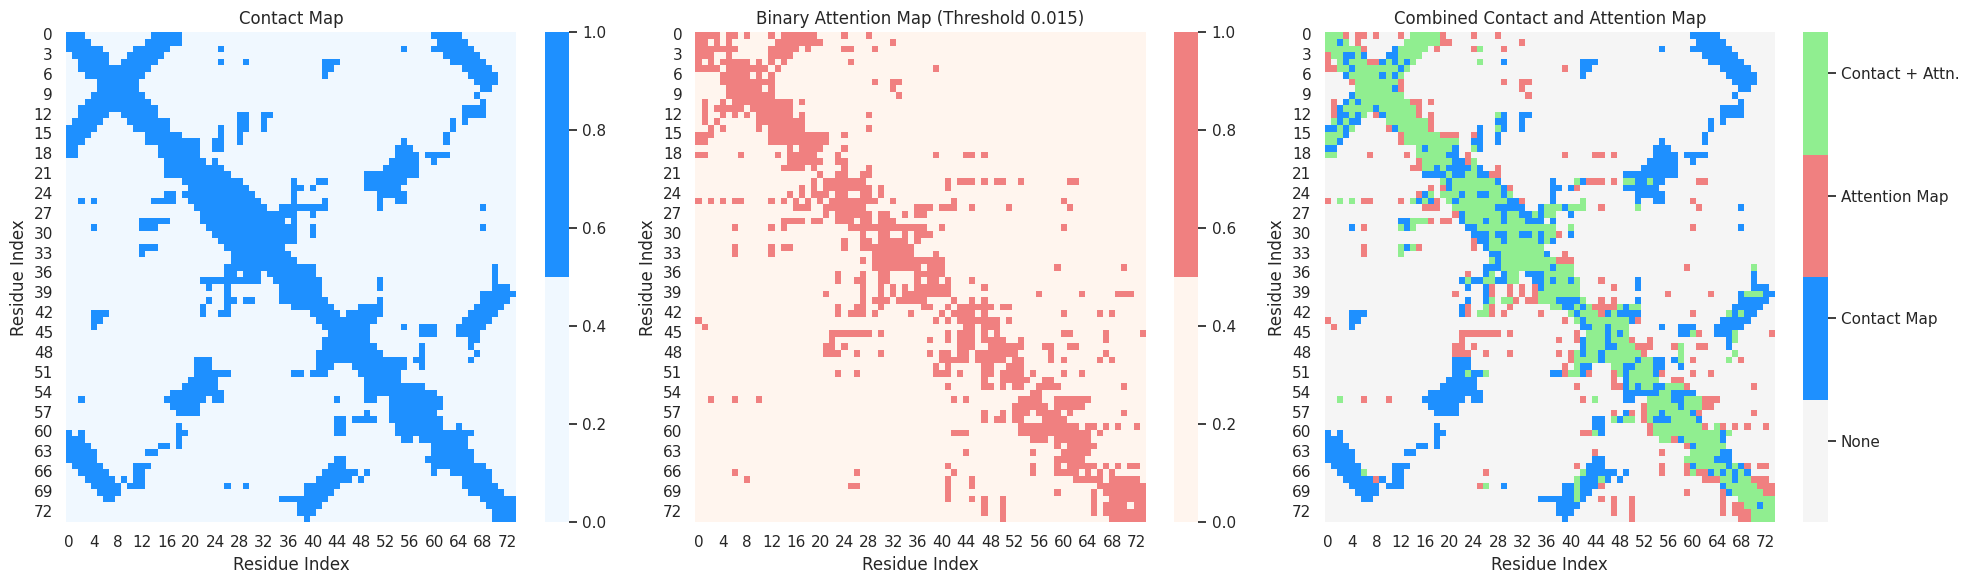

*Future work*

For future work, investigation could focus on studying whether specific attention heads show specialization toward certain amino acids. This analysis would provide insight into whether certain heads are specific to particular types of amino acid interactions. Additionally, studying whether amino acids with similar structural and functional properties receive similar attention across heads could reveal how the model interprets biologically relevant groupings. It would also be interesting to see how correlation changes when using ESM2 models of differencet sizes, specifically checking if higher correlations are obtained when using models with more layers.